
# Analysis of Energy Usage by Local Manufacturing Units in Germany

This Jupyter notebook presents an exhaustive analysis of data concerning energy usage by local manufacturing units in Germany. The analysis specifically targets various aspects of electricity, including its production, procurement, distribution, and consumption. Through this exploration, we aim to unravel critical insights about the energy dynamics within the manufacturing sector.

# Business Understanding
The key motivations behind this project are the following questions:

- How has the total electricity consumption changed over time for each industry?
- Which industry has seen the largest increase or decrease in electricity consumption over the years?
- Are there trends in the data that suggest certain industries are becoming more energy efficient over time?

## Table of Contents
1. Loading and Initial Data Exploration
2. Data Preprocessing
3. Visualization of Electricity Consumption Trends
4. Efficiency Analysis
5. Conclusions
6. References



## 1. Loading and Initial Data Exploration

In this section, we'll load the dataset and conduct an initial exploration to understand its structure and data types.


In [1]:

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:

df = pd.read_csv('EnergyUse.csv')
print(df.dtypes)
df.head()


local units in manufacturing                                object
Time, year                                                   int64
Own electricity production (net), MWh                      float64
Procurem. of elect. (incl. from foreign countries), MWh    float64
Distrib. of elect. (incl. to foreign countries), MWh       float64
Electricity consumption, MWh                               float64
dtype: object


,local units in manufacturing,"Time, year","Own electricity production (net), MWh","Procurem. of elect. (incl. from foreign countries), MWh","Distrib. of elect. (incl. to foreign countries), MWh","Electricity consumption, MWh"
0,"Mining and quarrying, manufacturing",2008,47128563.0,231162752.0,28095956.0,250195359.0
1,Mining and quarrying,2008,10246892.0,11032724.0,10822123.0,10457494.0
2,Mining of coal and lignite,2008,9636485.0,8557706.0,10658228.0,7535963.0
3,Extraction of crude petroleum and natural gas,2008,129645.0,458168.0,68596.0,519217.0
4,Mining of metal ores,2008,NaN,NaN,NaN,NaN



## 2. Data Preprocessing

Next, we'll preprocess the data to make it suitable for analysis. This includes filling missing values, renaming columns, and grouping the data.


In [32]:

df = df.fillna(0)
df.columns = ['Industry', 'Year', 'Own_Production, MWh', 'Procurement, MWh', 'Distribution, MWh', 'Consumption, MWh']
df_grouped = df.groupby(['Industry', 'Year'])['Consumption, MWh'].sum().reset_index()
df_pivot = df_grouped.pivot(index='Year', columns='Industry', values='Consumption, MWh')
print("The original pivot table shape:", df_pivot.shape)
# Remove columns in df_pivot that contain zero values > 60%
df_pivot = df_pivot.loc[:, (df_pivot == 0).mean() < 0.6]
print("The pivot table shape after filtering:", df_pivot.shape)
df_pivot


The original pivot table shape: (14, 32)
The pivot table shape after filtering: (14, 30)


Industry,Extraction of crude petroleum and natural gas,Manuf. of basic pharmaceutical products and prep.,"Manuf. of computer,electronic and optical products","Manuf. of fabricated metal products, ex. machinery","Manuf. of motor vehicles, trailers, semi-trailers","Manuf. of wood, products of wood and cork etc.",Manufacture of basic metals,Manufacture of beverages,Manufacture of chemicals and chemical products,Manufacture of coke and refined petroleum products,Manufacture of electrical equipment,Manufacture of food products,Manufacture of furniture,Manufacture of leather and related products,Manufacture of machinery and equipment n.e.c.,Manufacture of other non-metallic mineral products,Manufacture of other transport equipment,Manufacture of paper and paper products,Manufacture of rubber and plastic products,Manufacture of textiles,Manufacture of tobacco products,Manufacture of wearing apparel,Manufacturing,Mining and quarrying,"Mining and quarrying, manufacturing",Mining of coal and lignite,Other manufacturing,Other mining and quarrying,Printing and reproduction of recorded media,Repair and installation of machinery and equipment
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,519217.0,2140313.0,6278120.0,12765758.0,17131702.0,4677852.0,45656441.0,2459059.0,49587572.0,7146322.0,5637659.0,15283823.0,1396048.0,139002.0,11865330.0,12802840.0,1399602.0,21393850.0,14164899.0,2309678.0,272224.0,219412.0,239737865.0,10457494.0,250195359.0,7535963.0,1310052.0,2395494.0,2822296.0,878010.0
2009,541617.0,1984473.0,3948553.0,10509067.0,14490169.0,4474225.0,33474105.0,2170477.0,42878922.0,8348417.0,4791545.0,15397194.0,1373194.0,129768.0,9972348.0,11628116.0,1353652.0,21760275.0,12662621.0,1997267.0,265295.0,186430.0,208268028.0,22618.0,216651985.0,3748781.0,1265909.0,2067566.0,2751607.0,1010723.0
2010,568546.0,1974640.0,4180990.0,12714105.0,16468883.0,4510108.0,40737401.0,2161484.0,50361587.0,6747391.0,5155695.0,15028488.0,1241963.0,133539.0,10859475.0,12234365.0,1368673.0,21543741.0,13929356.0,2165881.0,287140.0,0.0,229118796.0,1516727.0,239390447.0,15643865.0,1347676.0,2124371.0,2752773.0,983088.0
2011,643610.0,2023758.0,5074052.0,13869385.0,16750769.0,4551716.0,41475211.0,2234160.0,50498235.0,7120983.0,6140445.0,15240295.0,1379022.0,136137.0,11277906.0,12917905.0,1427971.0,21216232.0,14095714.0,2210129.0,296282.0,0.0,235027561.0,0.0,244818554.0,7222646.0,1397548.0,1882448.0,2652130.0,866668.0
2012,630978.0,2090933.0,5034113.0,13842035.0,16510606.0,4332212.0,39618445.0,2198616.0,50060220.0,6939772.0,6189576.0,15512090.0,1226899.0,135153.0,11385602.0,12274958.0,1428515.0,20397627.0,13968765.0,2083999.0,270226.0,163045.0,231389150.0,8531836.0,239920987.0,6086071.0,1418628.0,1770575.0,3332321.0,974794.0
2013,0.0,2046731.0,4712114.0,15185572.0,16902260.0,4317078.0,39007919.0,2153057.0,49682677.0,7540705.0,6104448.0,15410757.0,1208547.0,127325.0,11199896.0,12230150.0,1418210.0,19762186.0,13865277.0,1960993.0,256885.0,154678.0,230062890.0,8383334.0,238446225.0,5976836.0,1437190.0,1746721.0,2576737.0,801497.0
2014,618643.0,2017141.0,4640297.0,15903137.0,17110605.0,4278269.0,39738852.0,2118155.0,51469465.0,6539013.0,7330360.0,15693479.0,1175086.0,129105.0,11429405.0,12120386.0,1425154.0,19515779.0,13988438.0,1911563.0,262099.0,151838.0,233543158.0,8347365.0,241890523.0,5911104.0,1397645.0,0.0,2417038.0,780849.0
2015,627114.0,2055347.0,4643645.0,12891673.0,17061548.0,4491810.0,41933472.0,2118551.0,51409411.0,6349616.0,4723433.0,15808673.0,1176029.0,137441.0,11162405.0,12295736.0,1453255.0,18987839.0,13882219.0,1973887.0,266723.0,147652.0,229487936.0,8793968.0,238281904.0,0.0,1429590.0,1737139.0,2335200.0,752780.0
2016,623974.0,2045636.0,4696867.0,13047052.0,16594608.0,4636842.0,43040217.0,2160443.0,51531079.0,6535054.0,4695583.0,16105700.0,1189199.0,133068.0,11026439.0,12317781.0,1425506.0,18795940.0,14208786.0,1915047.0,255373.0,143274.0,231348509.0,8254309.0,239602818.0,5833869.0,1475403.0,1783188.0,2623395.0,750217.0



## 3. Visualization of Electricity Consumption Trends

In this section, we'll visualize the normalized electricity consumption for each industry over time. This will help in understanding which industries have increased or decreased their electricity consumption over the years.


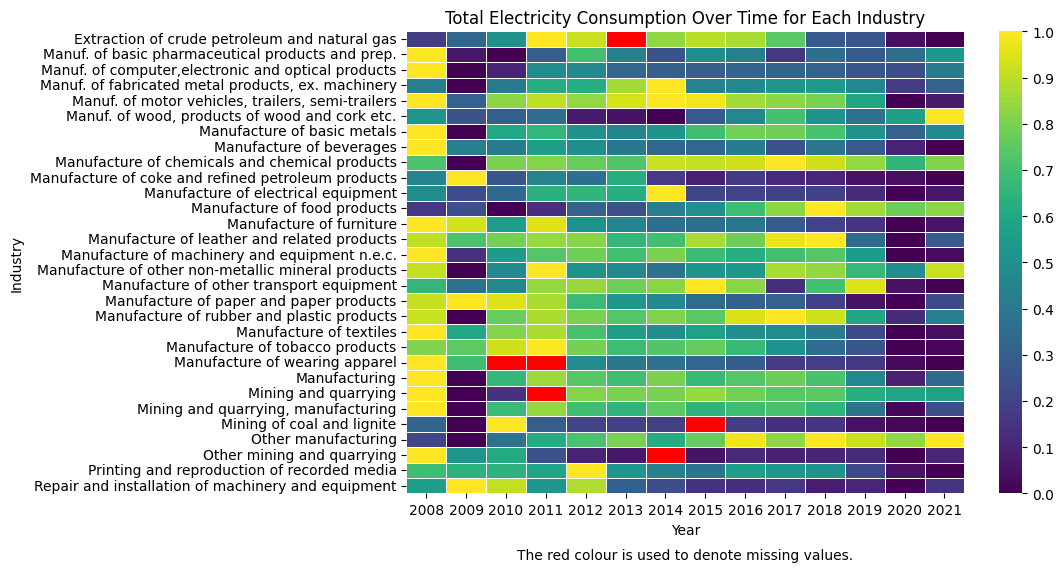

In [33]:

def normalize_non_zero_min(series):
    """
    Normalize a pandas Series using the min-max normalization method.

    Instead of using the absolute minimum of the series, this function uses
    the smallest non-zero value as the minimum for normalization. If all
    values are zero, the absolute minimum (i.e., 0) is used.

    Parameters:
    - series (pd.Series): The input pandas Series to be normalized.

    Returns:
    - pd.Series: The normalized series.

    Example:
    >>> s = pd.Series([0, 5, 10, 15])
    >>> normalize_non_zero_min(s)
    0    0.0
    1    0.0
    2    0.5
    3    1.0
    dtype: float64
    """
    sorted_series = series.sort_values()
    min_val = next((x for x in sorted_series if x != 0), sorted_series.iloc[0])  # use the first non-zero value
    return (series - min_val) / (series.max() - min_val)

df_pivot_normalized = df_pivot.apply(normalize_non_zero_min)
df_pivot_normalized = df_pivot_normalized.where(df_pivot_normalized >= 0)

cmap = plt.get_cmap('viridis')
cmap.set_bad(color='red')

f, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Total Electricity Consumption Over Time for Each Industry')
sns.heatmap(df_pivot_normalized.T, linewidths=.5, ax=ax, cmap=cmap, cbar_kws={"ticks":np.linspace(0, 1, 11)})
plt.text(7, 34, 'The red colour is used to denote missing values.', horizontalalignment='center', verticalalignment='center')
plt.show()


In [42]:

df_pivot_pct_change = (df_pivot.iloc[-1, :] - df_pivot.iloc[0, :]) / df_pivot.iloc[0, :] * 100
df_pivot_pct_change = df_pivot_pct_change.reset_index()
df_pivot_pct_change.columns = ['Industry', 'Percentage Change']
max_increase_industry = df_pivot_pct_change.loc[df_pivot_pct_change['Percentage Change'].idxmax()]
max_decrease_industry = df_pivot_pct_change.loc[df_pivot_pct_change['Percentage Change'].idxmin()]
print("max_increase_industry: '" + str(max_increase_industry[0]) + "' by percentage: " + str(max_increase_industry[1]))
print("max_increase_industry: '" + str(max_decrease_industry[0]) + "' by percentage: " + str(max_decrease_industry[1]))


max_increase_industry: 'Other manufacturing' by percentage: 12.982156433485084
max_increase_industry: 'Mining of coal and lignite' by percentage: -50.803938395132775


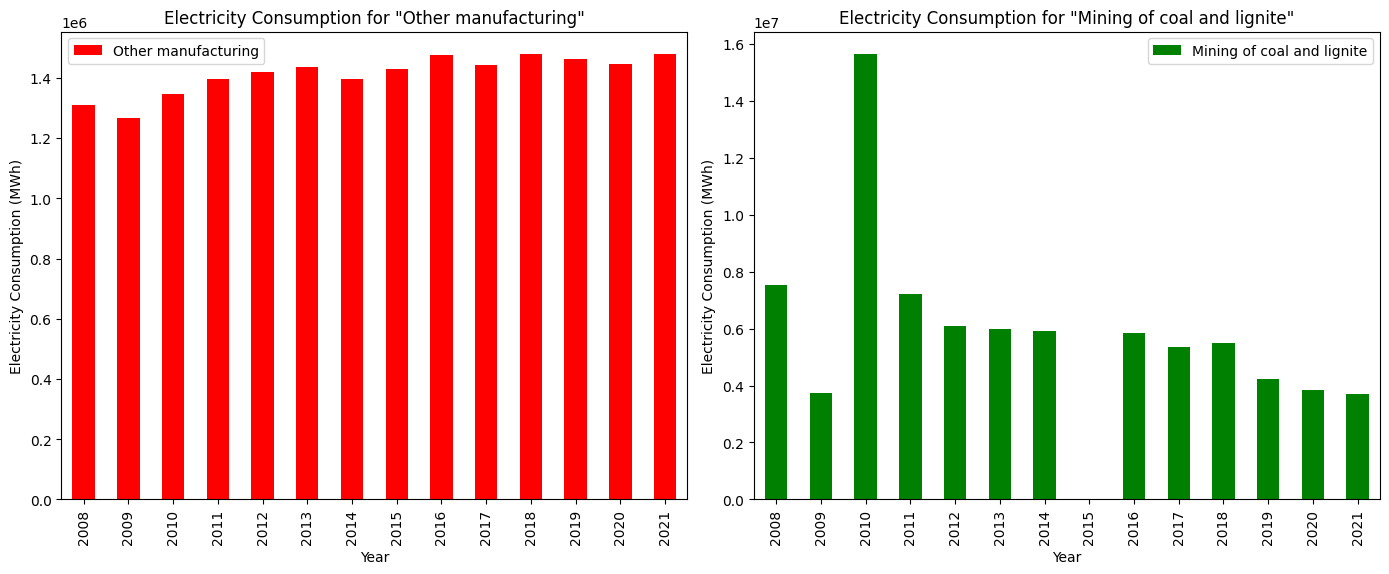

In [46]:
# Create a new figure
plt.figure(figsize=(14, 6))

# Draw the bar plot for the industry with the maximum increase
ax1 = plt.subplot(1, 2, 1)
df_pivot.plot(kind='bar', y=max_increase_industry[0], ax=ax1, color="red")
plt.title('Electricity Consumption for "{}"'.format(max_increase_industry[0]))
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (MWh)')

# Draw the bar plot for the industry with the maximum decrease
ax2 = plt.subplot(1, 2, 2)
df_pivot.plot(kind='bar', y=max_decrease_industry[0], ax=ax2, color="green")
plt.title('Electricity Consumption for "{}"'.format(max_decrease_industry[0]))
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (MWh)')

# Show the plot
plt.tight_layout()
plt.show()



## 4. Efficiency Analysis

To understand if certain industries have become more energy-efficient over time, we'll compare the percentage changes in their electricity production and consumption.


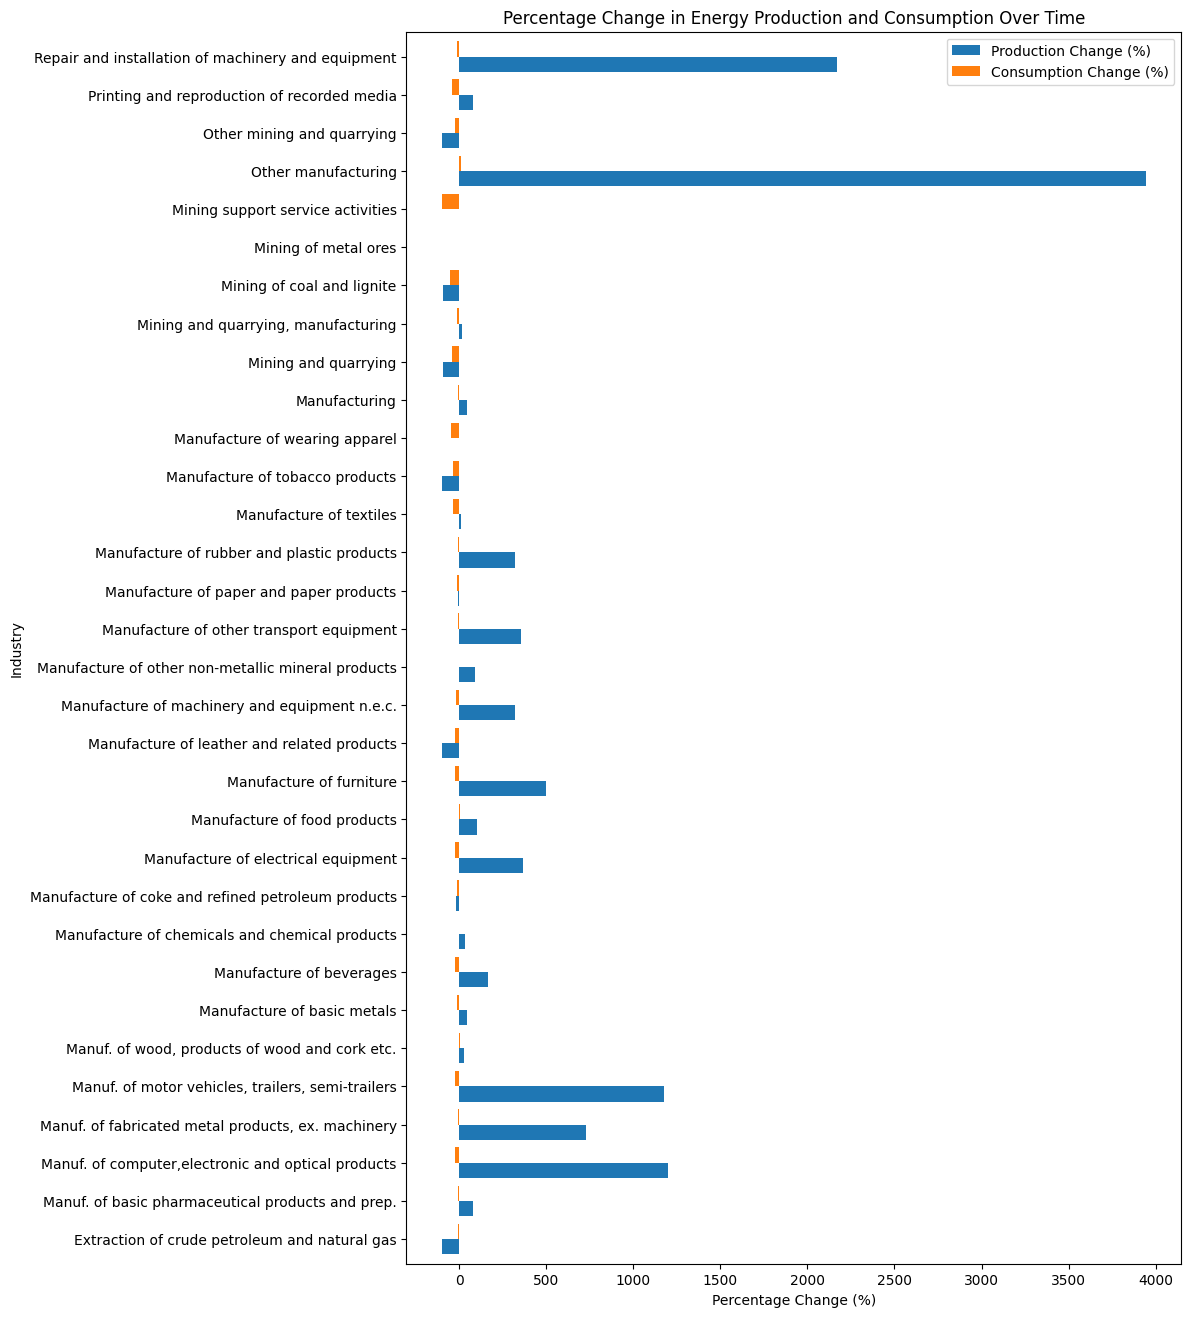

In [19]:

production_grouped = df.groupby(['Industry', 'Year'])['Own_Production, MWh'].sum().reset_index()
production_pivot = production_grouped.pivot(index='Year', columns='Industry', values='Own_Production, MWh')
consumption_grouped = df.groupby(['Industry', 'Year'])['Consumption, MWh'].sum().reset_index()
consumption_pivot = consumption_grouped.pivot(index='Year', columns='Industry', values='Consumption, MWh')
production_pct_change = ((production_pivot.loc[production_pivot.index[-1]] - production_pivot.loc[production_pivot.index[0]]) / production_pivot.loc[production_pivot.index[0]]) * 100
consumption_pct_change = ((consumption_pivot.loc[consumption_pivot.index[-1]] - consumption_pivot.loc[consumption_pivot.index[0]]) / consumption_pivot.loc[consumption_pivot.index[0]]) * 100
increased_efficiency_industries_pct = production_pct_change[(production_pct_change > consumption_pct_change)].index.tolist()

pct_change_df_all = pd.DataFrame({
    'Production Change (%)': production_pct_change,
    'Consumption Change (%)': consumption_pct_change
})

pct_change_df_all.plot(kind='barh', figsize=(10, len(production_pct_change) / 2), width=0.8)
plt.xlabel('Percentage Change (%)')
plt.ylabel('Industry')
plt.title('Percentage Change in Energy Production and Consumption Over Time')
plt.show()



## 5. Conclusions

Based on the above visualizations and analysis, we can derive several insights:

1. Certain industries have shown a significant increase or decrease in electricity consumption over the years.
2. Some industries have potentially become more energy-efficient, as seen from the greater increase in their electricity production compared to their consumption.
3. The heatmap provides a clear visual representation of electricity consumption trends for different industries over time.

Further studies can incorporate more external factors and data to derive deeper insights into the energy dynamics of the manufacturing sector in Germany.

## 6. References
The used data in this project is retrieved from [Genesis_Destatis](https://www-genesis.destatis.de/genesis//online?operation=table&code=43531-0002&bypass=true&levelindex=1&levelid=1691420297686#abreadcrumb)
